# 4 Fourier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs

## 4.1 Fourier basis

As in classical signal processing, the Fourier transform plays a central role in graph signal processing. Getting the Fourier basis is however computationally intensive as it needs to fully diagonalize the Laplacian. While it can be used to filter signals on graphs, a better alternative is to use one of the fast approximations (see `pygsp.filters.Filter.filter`). Let's compute it nonetheless to visualize the eigenvectors of the Laplacian. Analogous to classical Fourier analysis, they look like sinuses on the graph. Let's plot the second and third eigenvectors (the first is constant). Those are graph signals, i.e. functions $s: \mathcal{V} \rightarrow \mathbb{R}^d$ which assign a set of values (a vector in $\mathbb{R}^d$ at every node $v \in \mathcal{V}$ of the graph.

The graph Fourier basis $U = [u_1, \ldots, u_N]$, where $u_i$ is the $i^\text{th}$ Fourier mode, is given by the eigendecomposition of the graph Laplacian $L$ such as
$$ L = U \Lambda U^\intercal. $$
$\Lambda = \operatorname{diag}([\lambda_1, \ldots, \lambda_N])$ is the diagonal matrix of squared "graph frequencies".

Indeed, the following relation holds:
$$ \lambda_i = u_i^\intercal L u_i $$

The parallel with classical signal processing is best seen on a ring graph, where the graph Fourier basis is equivalent to the classical Fourier basis. The following plot shows some eigenvectors drawn on a 1D and 2D embedding of the ring graph. While the signals are easier to interpret on a 1D plot, the 2D plot best represents the graph.

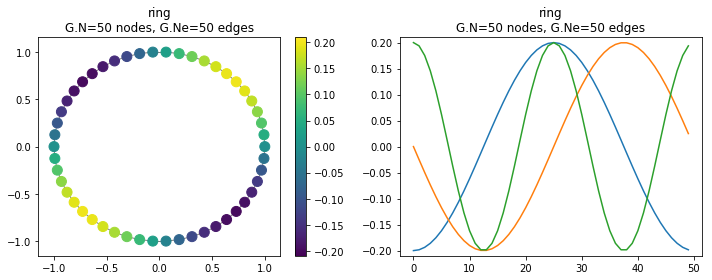

In [2]:
graph = graphs.Ring(N=50)
graph.compute_fourier_basis()
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
graph.plot_signal(graph.U[:, 4], ax=axes[0])
graph.set_coordinates('line1D')
graph.plot_signal(graph.U[:, 1:4], ax=axes[1])
fig.tight_layout()

Similarly, on the 2D Euclidean domain that is the grid graph.

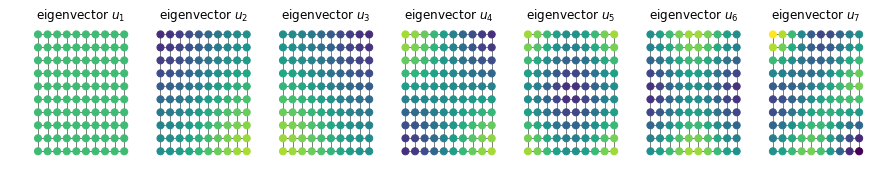

In [3]:
fig, axes = plt.subplots(1, 7, figsize=(15, 2.5))

G = graphs.Grid2d(10, 10)
G.compute_fourier_basis()

limits = [f(G.U[:, :len(axes)]) for f in (np.min, np.max)]

for i, ax in enumerate(axes):
    G.plot_signal(G.U[:, i], limits=limits, colorbar=False, vertex_size=50, ax=ax)
    ax.set_title(f'eigenvector $u_{i+1}$')
    ax.set_axis_off()

On more complicated domains, the intuition that lower frequencies should be smooth transfers.

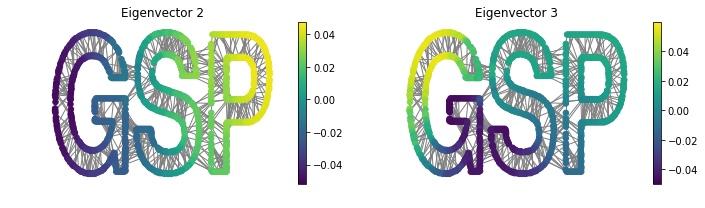

In [4]:
graph = graphs.Logo()
graph.compute_fourier_basis()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for i, ax in enumerate(axes):
    graph.plot_signal(graph.U[:, i+1], vertex_size=30, ax=ax)
    _ = ax.set_title('Eigenvector {}'.format(i+2))
    ax.set_axis_off()
fig.tight_layout()

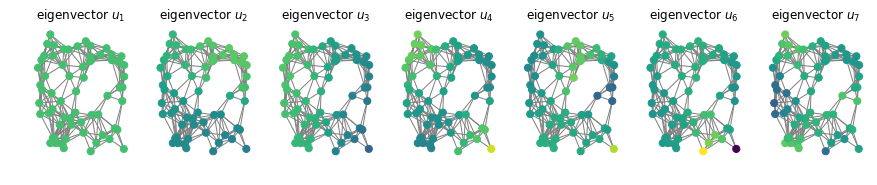

In [5]:
fig, axes = plt.subplots(1, 7, figsize=(15, 2.5))

G = graphs.Sensor(seed=42)
G.compute_fourier_basis()

limits = [f(G.U[:, :len(axes)]) for f in (np.min, np.max)]

for i, ax in enumerate(axes):
    G.plot_signal(G.U[:, i], limits=limits, colorbar=False, vertex_size=50, ax=ax)
    ax.set_title(f'eigenvector $u_{i+1}$')
    ax.set_axis_off()

#### Localization of some eigenvectors
A fundamental property of the classical Fourier modes is that they are delocalized. Put differently: a signal can never be localized in time/space and in the Fourier space. This Heisenberg principle does not transfer to graphs so easily. For instance, let us look at a very irregular graph: the comet graph. 

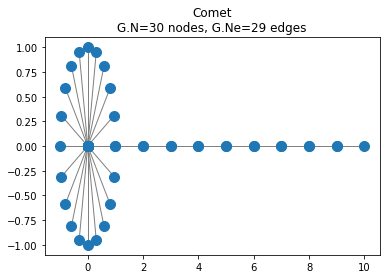

In [6]:
G = graphs.Comet(N=30, k=20)
graph.set_coordinates('spring')
G.compute_fourier_basis()
G.plot()

The largest entry in the Fourier basis is 0.97576999213641


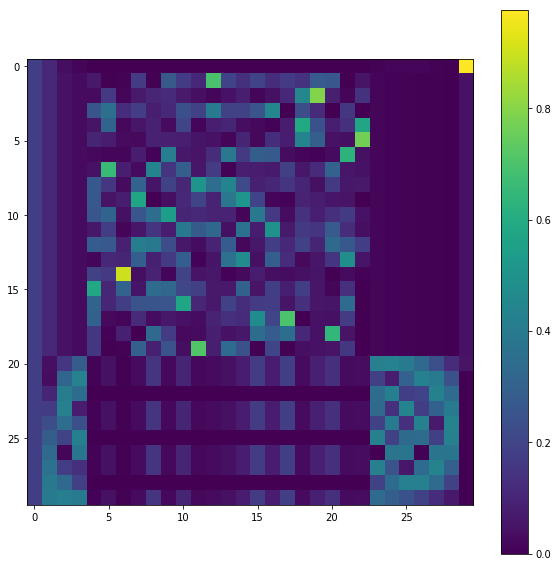

In [7]:
plt.figure(figsize=(10, 10))
plt.imshow(np.abs(G.U))
plt.colorbar()
print('The largest entry in the Fourier basis is ' + str(np.max(np.abs(G.U))))

Some Fourier modes are very localized! In fact, one can build graphs such that at least one of its Fourier modes tends to a Dirac. The localization phenomenon is not very well understood and controlled. It appears mostly at high frequency and on irregular graphs (even though you might have encountered localization when playing with the spectrum of SBMs in notebook 2). One always need to keep in mind this localization effect: some intuitions from the 'regular world' do not carry to arbitrary graphs!

## 4.2 Graph Fourier transform

The spectral content of a signal indicates if the signal is low-pass, band-pass, or high-pass. Again, intuition transfers from classical Fourier analysis.

In [8]:
from pygsp import filters

Text(0.5,0,"laplacian's eigenvalues / graph frequencies")

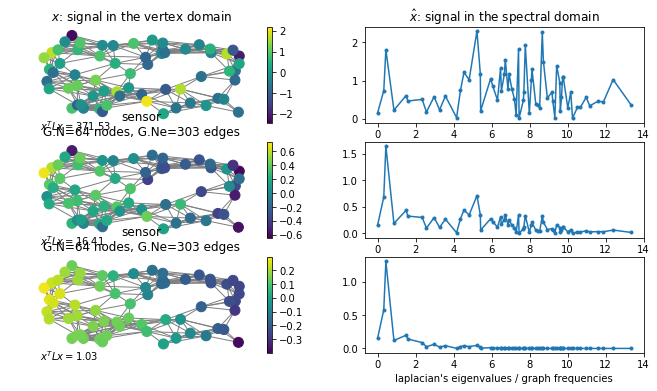

In [9]:
G = graphs.Sensor(seed=42)
G.compute_fourier_basis()

taus = [0, 3, 10]
fig, axes = plt.subplots(len(taus), 2, figsize=(11, 6))

x0 = np.random.RandomState(1).normal(size=G.N)
for i, tau in enumerate(taus):
    g = filters.Heat(G, tau)
    x = g.filter(x0).squeeze()
    x_hat = G.gft(x).squeeze()
    
    G.plot_signal(x, ax=axes[i, 0])
    axes[i, 0].set_axis_off()
    axes[i, 0].text(0, -0.2, '$x^T L x = {:.2f}$'.format(x.T @ G.L @ x))
    
    axes[i, 1].plot(G.e, np.abs(x_hat), '.-')
    
    #g.plot(ax=axes[i, 2])
    #axes[i, 2].set_xlabel('')
    #axes[i, 2].set_ylabel('')
    
axes[0, 0].set_title(r'$x$: signal in the vertex domain')
axes[0, 1].set_title(r'$\hat{x}$: signal in the spectral domain')
#axes[0, 2].set_title('Filter applied to white noise')
axes[-1, 1].set_xlabel("laplacian's eigenvalues / graph frequencies")
#axes[-1, 2].set_xlabel("laplacian's eigenvalues / graph frequencies")

## 4.3 Exercise

Verify $ \lambda_i = u_i^\intercal L u_i $ computationally.

In [10]:
# Your code here.

1. Make a band-pass signal in the spectral domain.
1. Compute the inverse Fourier transform.
1. Visualize your signal in the vertex domain.

In [11]:
# Your code here.